In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f'{v}, {G.degree(v)}')


Node Degree
0, 16
1, 9
2, 10
3, 6
4, 3
5, 4
6, 4
7, 4
8, 5
9, 2
10, 3
11, 1
12, 2
13, 5
14, 2
15, 2
16, 2
17, 2
18, 2
19, 3
20, 2
21, 2
22, 2
23, 5
24, 3
25, 3
26, 2
27, 4
28, 3
29, 4
30, 4
31, 6
32, 12
33, 17


/home/aaruran/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


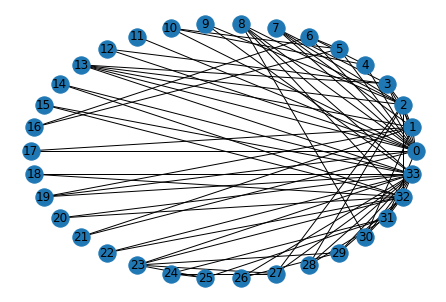

In [4]:
nx.draw_circular(G, with_labels=True)
plt.show()

In [7]:
nx.adjacency_matrix(G)

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [8]:
nx.incidence_matrix(G)

<34x78 sparse matrix of type '<class 'numpy.float64'>'
	with 156 stored elements in Compressed Sparse Column format>

In [9]:
G2 = nx.read_edgelist("zkcc-77/karate_edges_77.txt")

In [12]:
print("Node Degree")
for v in G2:
    print(f'{v}, {G2.degree(v)}')

Node Degree
1, 16
2, 9
3, 10
4, 6
5, 3
6, 4
7, 4
8, 4
9, 5
11, 3
12, 1
13, 2
14, 5
18, 2
20, 3
22, 2
32, 6
31, 4
10, 2
28, 4
29, 3
33, 12
17, 2
34, 16
15, 2
16, 2
19, 2
21, 2
23, 1
24, 5
26, 3
30, 4
25, 3
27, 2


In [13]:
nx.algorithms.is_isomorphic(G, G2)

False

Looks like the two graphs aren't exactly the same :O Troubling stuff.

In [14]:
small_graph = nx.Graph()

In [15]:
small_graph.add_nodes_from([1,2,3])

In [16]:
small_graph.add_edge(1,2)

In [18]:
small_graph.add_edges_from([(1,2), (1,3)])

In [19]:
small_graph.number_of_edges()

2

In [20]:
small_graph.number_of_nodes()

3

In [21]:
import numpy as np
# refernce: https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780

In [22]:
A = nx.adjacency_matrix(small_graph)

In [23]:
A

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [24]:
X = np.matrix([ 
    [i, -i] for i in range(A.shape[0]) 
], dtype=float)

In [25]:
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.]])

In [35]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[3., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]])

In [36]:
A_hat = A + np.eye(A.shape[0])
D_hat**-1 * A_hat * X

matrix([[ 1. , -1. ],
        [ 0.5, -0.5],
        [ 1. , -1. ]])

In [43]:
W = np.matrix([
    [1, -1],
    [-1, 1]
])
np.maximum(D_hat**-1 * A_hat * X * W, 0)

matrix([[2., 0.],
        [1., 0.],
        [2., 0.]])